<a href="https://colab.research.google.com/github/jaiklen/DPM_Project/blob/master/Backend_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
import datetime
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
import tweepy
import os
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('fivethirtyeight')

In [3]:
consumer_key = "KKkTazbDImIGKH2vSjqdsIKO9"
consumer_secret = "aF4URfFXK0t93omcBSUZNXN9qyC36wD3Yy7qG4nLOS3qyi1xst"
access_token = "1448641204367683587-lBd07TNTQQFPu7HCbsxY02u3Kc1Q72"
access_token_secret = "3XXClv7oXBEf2kQpiT0CRdgrBN4Lzjxkfi1UW6DdidikX"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

username = input("Please enter username: ")
#noOfTweet = int(input("Please enter how many tweets to analyze: "))
startDate = datetime.datetime(2021, 10, 1, 0, 0, 0)
endDate =   datetime.datetime(2021, 11, 9, 0, 0, 0)

#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tmpTweets = api.user_timeline(username)

tweets = []
for tweet in tmpTweets:
    if tweet.created_at < endDate and tweet.created_at > startDate:
        tweets.append(tweet)
        #print(tweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  print(neg,neu,pos)
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  if neg > pos:
    negative_list.append(tweet.text)
    negative+= 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive+= 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral+= 1


positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter username: virendersehwag
0.0 1.0 0.0
0.0 1.0 0.0
0.0 0.819 0.181
0.0 1.0 0.0
0.125 0.875 0.0
0.131 0.612 0.257
0.0 0.547 0.453
0.0 0.642 0.358
0.213 0.452 0.336
0.129 0.644 0.227
0.0 0.783 0.217
0.195 0.673 0.131
0.087 0.694 0.219
0.0 0.615 0.385
0.0 1.0 0.0
0.0 0.608 0.392
0.0 0.615 0.385
0.0 0.631 0.369
0.0 0.373 0.627


In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  19
positive number:  13
negative number:  2
neutral number:  4


In [8]:
tweet_list

,0
0,Answer this simple question :\n\nHow many colo...
1,India’s campaign at the #ICCT20WorldCup https:...
2,Catch the best opening batsmen of India talk a...
3,Having Kabuli Chana #NZvAFG https://t.co/6e4QM...
4,Feel a lot of pain on the demise of passing aw...
5,"Tough times don’t last long, tough people do. ..."
6,Wish you a very happy and dhamaakedaar Diwali....
7,"Many many happy returns of the day, Bhrata @VV..."
8,Very disappointing from India. NZ were amazing...
9,Saddened to hear about the passing away of #Pu...


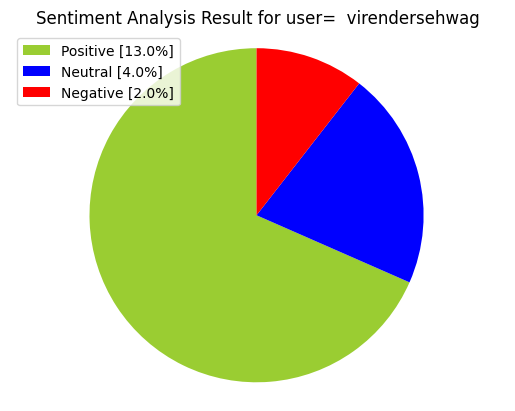

In [10]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for user=  "+username+"" )
plt.axis('equal')
plt.show()

In [11]:
tweet_list.drop_duplicates(inplace = True)

In [12]:
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Answer this simple question :\n\nHow many colo...,Answer this simple question :\n\nHow many colo...
1,India’s campaign at the #ICCT20WorldCup https:...,India’s campaign at the #ICCT20WorldCup https:...
2,Catch the best opening batsmen of India talk a...,Catch the best opening batsmen of India talk a...
3,Having Kabuli Chana #NZvAFG https://t.co/6e4QM...,Having Kabuli Chana #NZvAFG https://t.co/6e4QM...
4,Feel a lot of pain on the demise of passing aw...,Feel a lot of pain on the demise of passing aw...
5,"Tough times don’t last long, tough people do. ...","Tough times don’t last long, tough people do. ..."
6,Wish you a very happy and dhamaakedaar Diwali....,Wish you a very happy and dhamaakedaar Diwali....
7,"Many many happy returns of the day, Bhrata @VV...","Many many happy returns of the day, Bhrata @VV..."
8,Very disappointing from India. NZ were amazing...,Very disappointing from India. NZ were amazing...
9,Saddened to hear about the passing away of #Pu...,Saddened to hear about the passing away of #Pu...


In [13]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Answer this simple question :\n\nHow many colo...,answer this simple question how many colors...
1,India’s campaign at the #ICCT20WorldCup https:...,india s campaign at the icct20worldcup
2,Catch the best opening batsmen of India talk a...,catch the best opening batsmen of india talk a...
3,Having Kabuli Chana #NZvAFG https://t.co/6e4QM...,having kabuli chana nzvafg
4,Feel a lot of pain on the demise of passing aw...,feel a lot of pain on the demise of passing aw...
5,"Tough times don’t last long, tough people do. ...",tough times don t last long tough people do ...
6,Wish you a very happy and dhamaakedaar Diwali....,wish you a very happy and dhamaakedaar diwali ...
7,"Many many happy returns of the day, Bhrata @VV...",many many happy returns of the day bhrata ...
8,Very disappointing from India. NZ were amazing...,very disappointing from india nz were amazing...
9,Saddened to hear about the passing away of #Pu...,saddened to hear about the passing away of pu...


In [14]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Answer this simple question :\n\nHow many colo...,answer this simple question how many colors...,0.300000,0.419048,neutral,0.000,1.000,0.000,0.0000
1,India’s campaign at the #ICCT20WorldCup https:...,india s campaign at the icct20worldcup,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,Catch the best opening batsmen of India talk a...,catch the best opening batsmen of india talk a...,0.666667,0.433333,positive,0.000,0.811,0.189,0.6369
3,Having Kabuli Chana #NZvAFG https://t.co/6e4QM...,having kabuli chana nzvafg,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Feel a lot of pain on the demise of passing aw...,feel a lot of pain on the demise of passing aw...,0.300000,0.900000,negative,0.130,0.870,0.000,-0.5106
5,"Tough times don’t last long, tough people do. ...",tough times don t last long tough people do ...,0.034444,0.626667,positive,0.144,0.574,0.282,0.5984
6,Wish you a very happy and dhamaakedaar Diwali....,wish you a very happy and dhamaakedaar diwali ...,0.575000,0.700000,positive,0.000,0.532,0.468,0.9336
7,"Many many happy returns of the day, Bhrata @VV...",many many happy returns of the day bhrata ...,0.650000,0.687500,positive,0.000,0.606,0.394,0.8316
8,Very disappointing from India. NZ were amazing...,very disappointing from india nz were amazing...,0.004000,0.652000,positive,0.220,0.433,0.347,0.5868
9,Saddened to hear about the passing away of #Pu...,saddened to hear about the passing away of pu...,0.400000,0.583333,positive,0.139,0.615,0.246,0.3818


In [15]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,13,68.42
neutral,4,21.05
negative,2,10.53


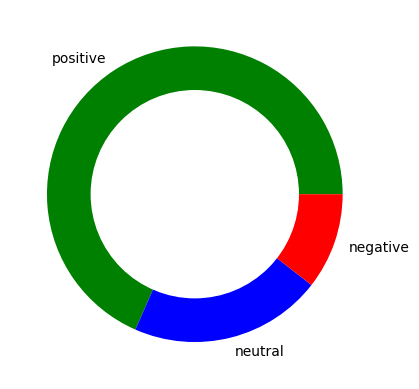

In [18]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [20]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,118.00
neutral,73.00
positive,89.62


In [22]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,23.50
neutral,11.25
positive,16.00


In [23]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [24]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

With given dates

In [ ]:
startDate = datetime.datetime(2021, 10, 1, 0, 0, 0)
endDate =   datetime.datetime(2021, 11, 9, 0, 0, 0)

In [ ]:
tmpTweets = api.user_timeline('virendersehwag') # with for a user 

In [ ]:
#public_tweets = api.search('Narendra modi')

In [ ]:
tweets = []
for tweet in tmpTweets:
    if tweet.created_at < endDate and tweet.created_at > startDate:
        tweets.append(tweet)
        print(tweet)


Status(_api=<tweepy.api.API object at 0x7f0fa3731950>, _json={'created_at': 'Mon Nov 08 06:43:33 +0000 2021', 'id': 1457599654502154243, 'id_str': '1457599654502154243', 'text': 'Answer this simple question :\n\nHow many colors of VS Track pants are available on https://t.co/JoEBwtWsYr &amp; what is… https://t.co/GEyCqA6mO0', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/JoEBwtWsYr', 'expanded_url': 'http://www.vsshop.in', 'display_url': 'vsshop.in', 'indices': [82, 105]}, {'url': 'https://t.co/GEyCqA6mO0', 'expanded_url': 'https://twitter.com/i/web/status/1457599654502154243', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 92

In [ ]:
pos = 0
neg = 0
neu = 0

In [ ]:
from textblob import TextBlob
polarity = 0
subjectivity = 0
for tweet in tweets:
  #print(tweet.text)
  analysis = TextBlob(tweet.text)
  p = analysis.sentiment.polarity
  polarity += p
  if(p > 0):
    pos += 1
  elif(p<0):
    neg += 1
  else:
    neu += 1
  subjectivity += analysis.sentiment.subjectivity
  print(analysis.sentiment)

Sentiment(polarity=0.3, subjectivity=0.41904761904761906)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.9)
Sentiment(polarity=0.03444444444444446, subjectivity=0.6266666666666667)
Sentiment(polarity=0.575, subjectivity=0.7)
Sentiment(polarity=0.65, subjectivity=0.6875)
Sentiment(polarity=0.05500000000000002, subjectivity=0.79)
Sentiment(polarity=0.39999999999999997, subjectivity=0.5833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7666666666666666, subjectivity=0.762962962962963)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.26, subjectivity=0.26)
Sentiment(polarity=0.26, subjectivity=0.26)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0

In [ ]:
n = len(tweets)
print('polarity = '+str(polarity/n), 'subjectivity = '+str(subjectivity/n))

polarity = 0.24338888888888888 subjectivity = 0.4486421957671958


In [ ]:
print(pos, neu, neg)

14 5 1
